In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

dataset = pd.read_csv("../data/logfile-storage-v5.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,datacenter_storage_energy,storage_id,system,storage_capacity,capacity_used,active_duration,idle_intervals,duration,total_energy_active,total_energy_idle,average_rotation_latency,average_seek_Time,max_internal_data_transfer_rate,is_active,idle_power,active_power,files,Unnamed: 19
0,3,Datacenter_1,4.099681e+06,0,storage,900000.0,899584.0,4635.372761,1.0000003378537212:,9447.595287,26885.162012,3.000001,0.003,0.004,198.0,False,3.0,5.8,"55596,3072,15.524809784082704:450990,1024,5.18...",NaN
1,3,Datacenter_1,4.099681e+06,1,storage,900000.0,899584.0,4552.153376,1.0000000057506384:,9447.595287,26402.489581,3.000000,0.003,0.004,198.0,False,3.0,5.8,"1002363,1024,5.178738666087011:287333,512,2.59...",NaN
2,3,Datacenter_1,4.099681e+06,2,storage,900000.0,899584.0,4712.463046,1.0000000137015315:,9447.595287,27332.285668,3.000000,0.003,0.004,198.0,False,3.0,5.8,"3-6852,8192,41.38862101694565:24-285602,512,2....",NaN
3,3,Datacenter_1,4.099681e+06,3,storage,900000.0,899584.0,4924.857340,1.0000000205963306:,9447.595287,28564.172570,3.000000,0.003,0.004,198.0,False,3.0,5.8,"303602,3584,18.10363760760568:1-591519,3072,15...",NaN
4,3,Datacenter_1,4.099681e+06,4,storage,900000.0,899584.0,4813.303893,1.000000024323157:,9447.595287,27917.162579,3.000000,0.003,0.004,198.0,False,3.0,5.8,"2-878359,1024,5.1852412125875285:2-1002249,102...",NaN


### Storage placement

#### Current data placement

Disk ID '0' at datacenter 'Datacenter_1' has 208 stored files.
Disk ID '1' at datacenter 'Datacenter_1' has 148 stored files.
Disk ID '2' at datacenter 'Datacenter_1' has 140 stored files.
Disk ID '3' at datacenter 'Datacenter_1' has 172 stored files.
Disk ID '4' at datacenter 'Datacenter_1' has 137 stored files.
Disk ID '5' at datacenter 'Datacenter_1' has 166 stored files.
Disk ID '6' at datacenter 'Datacenter_1' has 215 stored files.
Disk ID '7' at datacenter 'Datacenter_1' has 238 stored files.
Disk ID '8' at datacenter 'Datacenter_1' has 195 stored files.
Disk ID '9' at datacenter 'Datacenter_1' has 183 stored files.
Disk ID '10' at datacenter 'Datacenter_1' has 190 stored files.
Disk ID '11' at datacenter 'Datacenter_1' has 199 stored files.
Disk ID '12' at datacenter 'Datacenter_1' has 160 stored files.
Disk ID '13' at datacenter 'Datacenter_1' has 155 stored files.
Disk ID '14' at datacenter 'Datacenter_1' has 198 stored files.
Disk ID '15' at datacenter 'Datacenter_1' has 140 

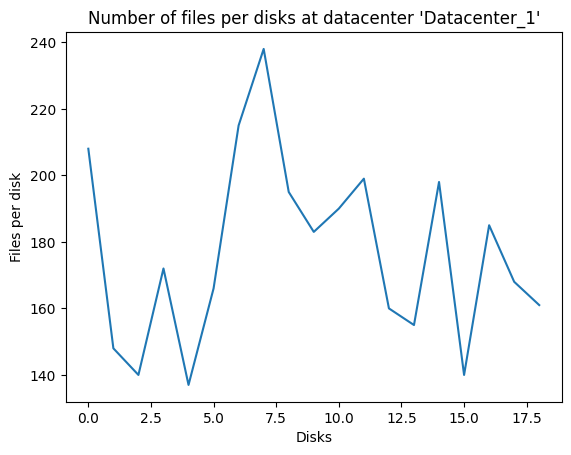

Disk ID '20' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '21' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '22' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '23' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '24' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '25' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '26' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '27' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '28' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '29' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '30' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '31' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '32' at datacenter 'Datacenter_2' has 326 stored files.
Disk ID '33' at datacenter 'Datacenter_2' has 326 stored files.


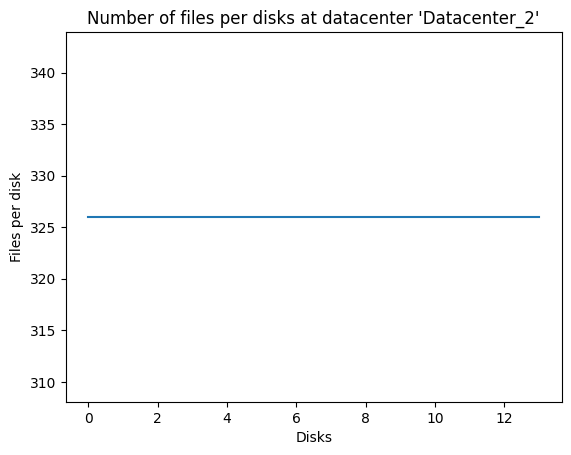

Disk ID '35' at datacenter 'Datacenter_3' has 326 stored files.
Disk ID '36' at datacenter 'Datacenter_3' has 326 stored files.
Disk ID '37' at datacenter 'Datacenter_3' has 326 stored files.
Disk ID '38' at datacenter 'Datacenter_3' has 326 stored files.
Disk ID '39' at datacenter 'Datacenter_3' has 326 stored files.
Disk ID '40' at datacenter 'Datacenter_3' has 326 stored files.
Disk ID '41' at datacenter 'Datacenter_3' has 326 stored files.
Disk ID '42' at datacenter 'Datacenter_3' has 326 stored files.
Disk ID '43' at datacenter 'Datacenter_3' has 326 stored files.
Disk ID '44' at datacenter 'Datacenter_3' has 326 stored files.
Disk ID '45' at datacenter 'Datacenter_3' has 326 stored files.
Disk ID '46' at datacenter 'Datacenter_3' has 325 stored files.
Disk ID '47' at datacenter 'Datacenter_3' has 325 stored files.
Disk ID '48' at datacenter 'Datacenter_3' has 325 stored files.


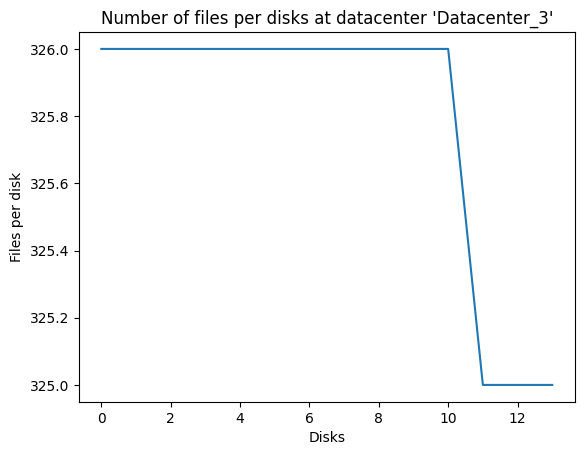

Disk ID '50' at datacenter 'Datacenter_4' has 186 stored files.
Disk ID '51' at datacenter 'Datacenter_4' has 184 stored files.
Disk ID '52' at datacenter 'Datacenter_4' has 156 stored files.
Disk ID '53' at datacenter 'Datacenter_4' has 138 stored files.
Disk ID '54' at datacenter 'Datacenter_4' has 154 stored files.
Disk ID '55' at datacenter 'Datacenter_4' has 175 stored files.
Disk ID '56' at datacenter 'Datacenter_4' has 208 stored files.
Disk ID '57' at datacenter 'Datacenter_4' has 325 stored files.
Disk ID '58' at datacenter 'Datacenter_4' has 325 stored files.
Disk ID '59' at datacenter 'Datacenter_4' has 325 stored files.
Disk ID '60' at datacenter 'Datacenter_4' has 325 stored files.
Disk ID '61' at datacenter 'Datacenter_4' has 325 stored files.
Disk ID '62' at datacenter 'Datacenter_4' has 325 stored files.
Disk ID '63' at datacenter 'Datacenter_4' has 325 stored files.


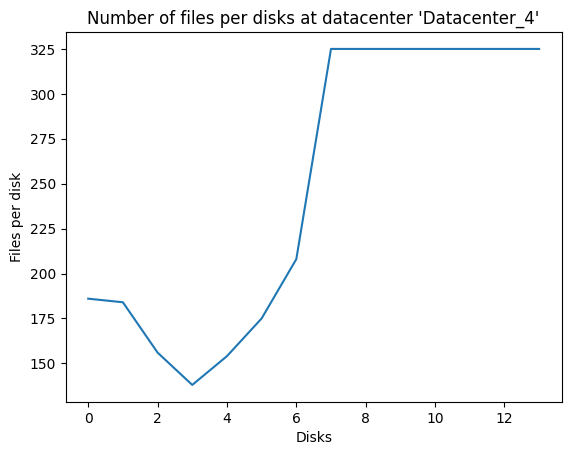

3358.0 stored files at datacenter 'Datacenter_1'.
4564.0 stored files at datacenter 'Datacenter_2'.
4561.0 stored files at datacenter 'Datacenter_3'.
3476.0 stored files at datacenter 'Datacenter_4'.
The cloud provider has 15959.0 stored files.


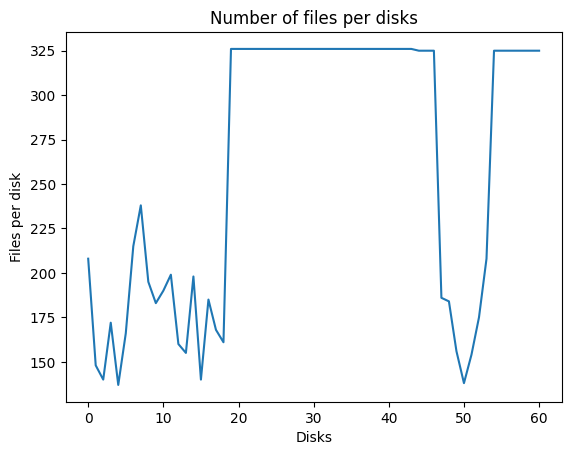

The number of powered down disks: 0


In [93]:
labels = np.unique(dataset['datacenter_name'])
duration = dataset['duration'][0]
files_per_datacenter = np.array([])
files_per_host = np.array([])
num_powered_down_disk = 0

max_power_per_disk = np.array([])
max_power_per_disk_duration = np.array([])
max_power_per_datacenter = np.array([])
max_power_per_datacenter_duration = np.array([])
current_power_per_disk = np.array([])
current_power_per_disk_duration = np.array([])
current_power_per_datacenter = np.array([])
current_power_per_datacenter_duration = np.array([])

datacenter_total_capacity = np.array([])
datacenter_total_duration = np.array([])

datacenter_disks = np.array([])
datacenter_current_disks_powered_on = np.array([])
datacenter_current_disks_powered_off = np.array([])

# datacenter_current_available_capacity = np.array([])
datacenter_current_used_capacity = np.array([])
datacenter_current_used_active_duration = np.array([])
datacenter_current_used_idle_duration = np.array([])

for i in range(len(labels)):
    files_per_datacenter_per_host = np.array([])
    
    max_capacity = 0
    max_duration = 0
    available_capacity = 0
    used_capacity = 0
    current_active_duration = 0
    current_idle_duration = 0
    
    disks = 0
    disks_power_on = 0
    disks_power_off = 0
    
    max_power = 0
    max_power_duration = 0
    current_power = 0
    current_power_duration = 0
    
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        if pd.notna(sample['files']):
            files = len(sample['files'].split(":")) - 1
            files_per_host = np.append(files_per_host, len(sample['files'].split(":")) - 1)
            files_per_datacenter_per_host = np.append(files_per_datacenter_per_host, len(sample['files'].split(":")) - 1)
            print(f"Disk ID '{sample['storage_id']}' at datacenter '{sample['datacenter_name']}' has {files} stored files.")
        
        max_power += sample['active_power']
        max_power_duration += sample['active_power'] * sample['duration']
        
        disks += 1
        
        max_capacity += sample['storage_capacity']
        max_duration += sample['duration']
        
        
        
        current_power_duration += float(sample['active_power']) * float(sample['active_duration']) + float(sample['idle_power']) * (float(sample['duration']) - float(sample['active_duration']))
        if sample['is_active'] == True or float(sample['active_duration']) > 0:
            disks_power_on += 1
            current_power += float(sample['active_power'])
            # available_capacity += (sample['storage_capacity'] - sample['capacity_used'])
            used_capacity += sample['capacity_used']
            current_active_duration += sample['active_duration']
            current_idle_duration += (sample['duration'] - sample['active_duration'])
        elif sample['is_active'] == False:
            disks_power_on += 1
            current_power += float(sample['idle_power'])
            # available_capacity += (sample['storage_capacity'] - sample['capacity_used'])
            used_capacity += sample['capacity_used']
            current_active_duration += sample['active_duration']
            current_idle_duration += (sample['duration'] - sample['active_duration'])
        else:
            num_powered_down_disk += 1
            disks_power_off += 1
            # available_capacity += 0
            used_capacity += sample['storage_capacity']
        
        
    files_per_datacenter = np.append(files_per_datacenter, np.sum(files_per_datacenter_per_host))
    
    max_power_per_datacenter = np.append(max_power_per_datacenter, max_power)
    max_power_per_datacenter_duration = np.append(max_power_per_datacenter_duration, max_power_duration)
    current_power_per_datacenter = np.append(current_power_per_datacenter, current_power)
    current_power_per_datacenter_duration = np.append(current_power_per_datacenter_duration, current_power_duration)
    
    datacenter_total_capacity = np.append(datacenter_total_capacity, max_capacity)
    datacenter_total_duration = np.append(datacenter_total_duration, max_duration)
    
    datacenter_disks = np.append(datacenter_disks, disks)
    datacenter_current_disks_powered_on = np.append(datacenter_current_disks_powered_on, disks_power_on)
    datacenter_current_disks_powered_off = np.append(datacenter_current_disks_powered_off, disks_power_off)
    
    # datacenter_current_available_capacity = np.append(datacenter_current_available_capacity, available_capacity)
    datacenter_current_used_capacity = np.append(datacenter_current_used_capacity, used_capacity)
    datacenter_current_used_active_duration = np.append(datacenter_current_used_active_duration, current_active_duration)
    datacenter_current_used_idle_duration = np.append(datacenter_current_used_idle_duration, current_idle_duration)
    
    plt.plot(np.arange(len(files_per_datacenter_per_host)), files_per_datacenter_per_host, label="Files per disk")
    plt.xlabel("Disks")
    plt.ylabel("Files per disk")
    plt.title(f"Number of files per disks at datacenter '{labels[i]}'")
    #plt.legend()
    plt.show()
for i in range(len(labels)):
    print(f"{files_per_datacenter[i]} stored files at datacenter '{labels[i]}'.")
print(f"The cloud provider has {np.sum(files_per_datacenter)} stored files.")

plt.plot(np.arange(len(files_per_host)), files_per_host, label="Files per disk")
plt.xlabel("Disks")
plt.ylabel("Files per disk")
plt.title("Number of files per disks")
#plt.legend()
plt.show()

print(f"The number of powered down disks: {num_powered_down_disk}")


#### Capacity aware data placement 

In [77]:

disks = []
files = []
for i, sample in dataset.iterrows():
    disks.append({
        "id": i,
        "datacenter": sample['datacenter_name'],
        "storage_capacity": float(sample['storage_capacity']),
        "capacity_used": float(sample['capacity_used']),
        "max_internal_data_transfer_rate": float(sample['max_internal_data_transfer_rate']),
        "is_active": bool(sample['is_active']),
        "active_duration": float(sample['active_duration']),
        "active_power": float(sample['active_power']),
        "idle_power": float(sample['idle_power'])

    })
    if pd.notna(sample['files']):
        for j, file in enumerate(sample['files'].split(":")):
            file_data = file.split(",")
            if len(file_data) != 3:
                continue
            files.append({
                "id": j,
                "filename": file_data[0],
                "filesize": float(file_data[1]),
                "transaction_time": float(file_data[2])
            })

files_copy = files.copy()
new_storage_placement = []
removed_files_from_copy = 0

for index_disk, disk in enumerate(disks):
    used_storage = 0
    files_per_disk = []
    for file in files_copy:
        if (file['filesize'] + used_storage) <= disk['storage_capacity']:
            used_storage += file['filesize']
            files_per_disk.append(file)
    
    # Adding to new list of placement of data and removing from the copy 
    new_storage_placement.append(files_per_disk)
    for index, file in enumerate(files_per_disk):
        run = True
        index = 0
        while run:
            if file['id'] == files_copy[index]['id']:
                del files_copy[index]
                run = False
            index += 1


Disk ID '0' has 208 stored files with capacity (899584.0/900000.0) as supposed to (899584.0/900000.0),
consuming the 1750.390556444444 over the duration 397.81603555555546s,
where the disk was idle for 198.90801777777773 which could have saved 596.7240533333331 if powered off.

Disk ID '1' has 148 stored files with capacity (899584.0/900000.0) as supposed to (899584.0/900000.0),
consuming the 1750.3905564444437 over the duration 397.81603555555546s,
where the disk was idle for 198.9080177777778 which could have saved 596.7240533333334 if powered off.

Disk ID '2' has 140 stored files with capacity (899584.0/900000.0) as supposed to (899584.0/900000.0),
consuming the 1750.3905564444442 over the duration 397.81603555555546s,
where the disk was idle for 198.9080177777777 which could have saved 596.7240533333331 if powered off.

Disk ID '3' has 172 stored files with capacity (899584.0/900000.0) as supposed to (899584.0/900000.0),
consuming the 1750.390556444443 over the duration 397.816035

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

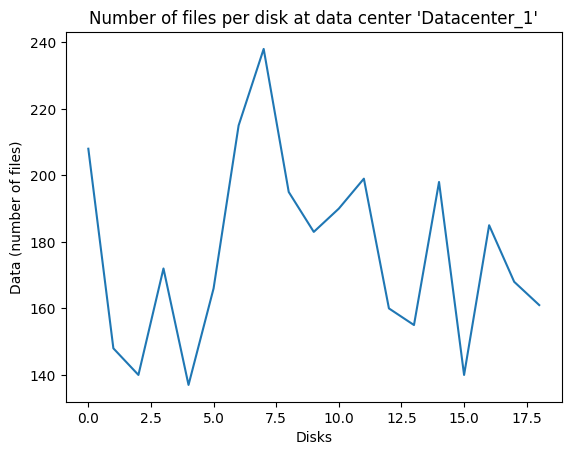

In [78]:
datacenter_new_placement_disks_powered_on = np.zeros(len(labels))
datacenter_new_placement_disks_powered_off = np.zeros(len(labels))
datacenter_new_placement_disk_power = np.zeros(len(labels))
datacenter_new_placement_disk_power_consumed = np.zeros(len(labels))

datacenter_new_placement_files = np.zeros(len(labels))
datacenter_new_placement_used_capacity = np.zeros(len(labels))
datacenter_new_placement_used_total_time = np.zeros(len(labels))
datacenter_new_placement_used_active_duration = np.zeros(len(labels))
datacenter_new_placement_used_idle_duration = np.zeros(len(labels))



# Getting new duration
max_time = 0
for index_disk, disk in enumerate(new_storage_placement):
    datacenter_index = np.where(disks[index_disk]['datacenter'] == labels)[0][0]
    transaction_time = 0
    for index_file, file in enumerate(disk):
        # Updating file transaction time for the disk
        # Formula from CloudSimDisk (add to thesis)
        seek_time = file['filesize'] / disks[index_disk]['storage_capacity']
        transfer_time =  (file['filesize'] * disks[index_disk]['max_internal_data_transfer_rate']) / disks[index_disk]['storage_capacity']
        file['transaction_time'] = seek_time + transfer_time
        transaction_time += file['transaction_time']
    if transaction_time > max_time:
        max_time += transaction_time

# Calculating the capacity used per disk and power consumption.
new_data_placement_per_disk = np.array([])
new_data_placement_per_datacenter_per_disk = {}
for index_disk, disk in enumerate(new_storage_placement):
    transaction_time = 0
    capacity_used = 0
    files = len(disk)
    datacenter_index = np.where(disks[index_disk]['datacenter'] == labels)[0][0]
    
    for index_file, file in enumerate(disk):
        capacity_used += file['filesize']
        transaction_time += file['transaction_time']
    
    
    new_data_placement_per_disk = np.append(new_data_placement_per_disk, files)
    if disks[index_disk]['datacenter'] not in new_data_placement_per_datacenter_per_disk.keys():
        # print(new_data_placement_per_datacenter_per_disk[hosts[index_host]['datacenter']])
        new_data_placement_per_datacenter_per_disk[disks[index_disk]['datacenter']] = np.array([])
    new_data_placement_per_datacenter_per_disk[disks[index_disk]['datacenter']] = np.append(new_data_placement_per_datacenter_per_disk[disks[index_disk]['datacenter']], files)
    
    datacenter_new_placement_files[datacenter_index] += files
    if capacity_used == 0:
        datacenter_new_placement_disks_powered_off[datacenter_index] += 1
    else:
        datacenter_new_placement_disks_powered_on[datacenter_index] += 1
        datacenter_new_placement_used_capacity[datacenter_index] += capacity_used
        
        datacenter_new_placement_used_active_duration[datacenter_index] += transaction_time
        datacenter_new_placement_used_idle_duration[datacenter_index] += max_time - transaction_time
        datacenter_new_placement_used_total_time[datacenter_index] += max_time
        
        if transaction_time > 0:
            datacenter_new_placement_disk_power[datacenter_index] += disks[index_disk]['active_power']
            datacenter_new_placement_disk_power_consumed[datacenter_index] += disks[index_disk]['active_power'] * transaction_time
    
    if files != 0:
        print(f"Disk ID '{index_disk}' has {files} stored files with capacity ({capacity_used}/{disks[index_disk]['storage_capacity']}) as supposed to ({disks[index_disk]['capacity_used']}/{disks[index_disk]['storage_capacity']}),\nconsuming the {(disks[index_disk]['active_power']*transaction_time) + (disks[index_disk]['idle_power']*(max_time - transaction_time))} over the duration {max_time}s,\nwhere the disk was idle for {max_time - transaction_time} which could have saved {disks[index_disk]['idle_power']*(max_time - transaction_time)} if powered off.\n")
    else:
        print(f"Disk ID '{index_disk}' has {files} stored files with capacity ({capacity_used}/{disks[index_disk]['storage_capacity']}) as supposed to ({disks[index_disk]['capacity_used']}/{disks[index_disk]['storage_capacity']}),\ncan be powered off consuming 0 Joules (J) over the duration {max_time}s.\n")

for key in new_data_placement_per_datacenter_per_disk.keys():
    plt.plot(np.arange(len(new_data_placement_per_datacenter_per_disk[key])), new_data_placement_per_datacenter_per_disk[key], label="Files per host")
    plt.xlabel("Disks")
    plt.ylabel("Data (number of files)")
    plt.title(f"Number of files per disk at data center '{key}'")
    #plt.legend()
    plt.savefig(f"../figs/storage/power/{labels[key]}_simple_capacity_aware_placement.eps", format="eps")
    plt.show()

plt.plot(np.arange(len(new_data_placement_per_disk)), new_data_placement_per_disk, label="Files per host")
plt.xlabel("Disks")
plt.ylabel("Data (number of files)")
plt.title("Number of files per disks")
#plt.legend()
plt.savefig(f"../figs/storage/storage_placement/cloud_provider_simple_capacity_aware_placement.eps", format="eps")
plt.show()

#### Optimal capacity aware storage placement 

### Re-organization of file placement

Rebalancing over utilized and under utilized disk capacity with the goal if better utilizing the storage area network.

In [ ]:
labels = np.unique(dataset['datacenter_name'])
files_reorganized = []
disks_reorganized = []

files_to_reallocate = np.array([])
over_utilized_disks = 0
under_utilized_disks = 0

for i in range(len(labels)):
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        files_temp = []
        if pd.notna(sample['files']):
            for index_file, file in enumerate(sample['files'].split(":")):
                    if file != "":
                        file_data = file.split(",")
                        files_temp.append({
                            "id": index_file,
                            "filename": file_data[0],
                            "filesize": float(file_data[1]),
                            "transaction_time": float(file_data[2])
                        })
        
        # check if disk is over utilized
        capacity_utilization = sample['capacity_used'] / sample['storage_capacity']
        
        if capacity_utilization >= 0.9:
            over_utilized_disks += 1
            if pd.notna(sample['files']):
                temp_capacity_used = sample['capacity_used']
                
                run = True
                for index_file, file in enumerate(sample['files'].split(":")):
                    if run == True and file != "":
                        file_data = file.split(",")
                        capacity_utilization = (sample['capacity_used'] - float(file_data[1])) / sample['storage_capacity']
                        
                        
                        if capacity_utilization >= 0.8 and capacity_utilization <= 0.9:
                            temp_capacity_used -= float(file_data[1])
                            files_to_reallocate = np.append(files_to_reallocate, files_temp[index_file])
                            del files_temp[index_file]
                            
                            run = False
                sample['capacity_used'] = temp_capacity_used
        elif capacity_utilization == 0:
            pass
        elif capacity_utilization < 0.8:
            under_utilized_disks += 1
            
    
        disks_reorganized.append({
            "id": i,
            "datacenter": sample['datacenter_name'],
            "storage_capacity": float(sample['storage_capacity']),
            "capacity_used": float(sample['capacity_used']),
            "is_active": bool(sample['is_active']),
            "active_duration": float(sample['active_duration']),
            "active_power": float(sample['active_power']),
            "idle_power": float(sample['idle_power']),
            "files": files_temp
        })
print(f"There were {over_utilized_disks} over utilized disks")
print(f"There were {under_utilized_disks} under utilized disks")

# Re allocating files
for disk in disks_reorganized:
    capacity_utilization = disk['capacity_used'] / disk['storage_capacity']
    new_capacity_used = disk['capacity_used']
    new_allocated_files = disk['files']
    
    if capacity_utilization <= 0.9:
        for index_file, file in enumerate(files_to_reallocate):
            temp_capacity_used = new_capacity_used
            temp_capacity_used += file['filesize']
            if (temp_capacity_used / disk['storage_capacity']) <= 0.9:
                new_capacity_used += file['filesize']
                new_allocated_files.append(file)
                files_to_reallocate.remove(file)
        disk['capacity_used'] = new_capacity_used
        disk['files'] = new_allocated_files

# consolidate under utilized disks
underutilized_disk = None
num_new_reorganized_powered_down_disk = 0
for disk in disks_reorganized:
    capacity_utilization = disk['capacity_used'] / disk['storage_capacity']
    if capacity_utilization < 0.8:
        if underutilized_disk == None:
            underutilized_disk = disk
            continue
        else:
            # moving files from one disk to another
            temp_underutilized_disk_new_allocated_files = underutilized_disk['files'].copy()
            temp_current_disk_new_allocated_files = disk['files'].copy()
            
            temp_underutilized_disk_capacity_used = underutilized_disk['capacity_used']
            temp_current_disk_capacity_used = disk['capacity_used']
            
            for index_file, file in enumerate(disk['files']):
                if ((temp_underutilized_disk_capacity_used + file['filesize']) / underutilized_disk['storage_capacity']) <= 0.9:
                    temp_underutilized_disk_capacity_used += file['filesize']
                    temp_underutilized_disk_new_allocated_files.append(file)
                    
                    temp_current_disk_capacity_used -= file['filesize']
                    temp_current_disk_new_allocated_files.remove(file)
            
            underutilized_disk['capacity_used'] = temp_underutilized_disk_capacity_used
            underutilized_disk['files'] = temp_underutilized_disk_new_allocated_files
            
            disk['capacity_used'] = temp_current_disk_capacity_used
            disk['files'] = temp_current_disk_new_allocated_files
            
            if disk['capacity_used'] == 0:
                num_new_reorganized_powered_down_disk += 1
                disk['is_active'] = False
                disk['active_duration'] = 0
                
                if underutilized_disk['capacity_used'] / underutilized_disk['storage_capacity'] >= 0.8:
                    underutilized_disk = None
            else:
                underutilized_disk = disk

num_new_reorganized_under_utilized_disk = 0
num_new_reorganized_over_utilized_disk = 0
for disk in disks_reorganized:
    disk_utilization = disk['capacity_used'] / disk['storage_capacity']
    if disk_utilization <= 0.8 and disk_utilization != 0:
        num_new_reorganized_under_utilized_disk += 1
    elif disk_utilization > 0.9:
        num_new_reorganized_over_utilized_disk += 1

There were 26 over utilized disks
There were 35 under utilized disks


### Comparing

In [ ]:
print(f"New total collective duration {np.sum(datacenter_new_placement_used_total_time)}")
print(f"Out of the {np.sum(datacenter_disks)} available disks {np.sum(datacenter_new_placement_disks_powered_on)} could be are powered on and {np.sum(datacenter_new_placement_disks_powered_off)} disks could powered down. (percent: {(np.sum(datacenter_new_placement_disks_powered_on)/np.sum(datacenter_disks))*100}%)")
print(f"Out of the {np.sum(datacenter_total_capacity)} available capacity {np.sum(datacenter_new_placement_used_capacity)} are used. (percent: {((np.sum(datacenter_new_placement_used_capacity))/np.sum(datacenter_total_capacity))*100}%)")
print(f"With a total active duration of all disks {np.sum(datacenter_new_placement_used_active_duration)} out of a total duration between all disks {np.sum(datacenter_new_placement_used_total_time)}. (percent: {((np.sum(datacenter_new_placement_used_active_duration))/np.sum(datacenter_new_placement_used_total_time))*100}%)")
print(f"With a total inactive duration of all disks {np.sum(datacenter_new_placement_used_idle_duration)} out of a total duration between all disks {np.sum(datacenter_new_placement_used_total_time)}. (percent: {((np.sum(datacenter_new_placement_used_idle_duration))/np.sum(datacenter_new_placement_used_total_time))*100}%)")
print("Compared to:")
print(f"Previous total collective duration {np.sum(datacenter_total_duration)}")
print(f"Out of the {np.sum(datacenter_disks)} available disks {np.sum(datacenter_current_disks_powered_on)} could be are powered on and {np.sum(datacenter_current_disks_powered_off)} hosts could powered down. (percent: {(np.sum(datacenter_current_disks_powered_off)/np.sum(datacenter_disks))*100}%)")
print(f"Out of the {np.sum(datacenter_total_capacity)} available capacity {np.sum(datacenter_new_placement_used_capacity)} are used. (percent: {((np.sum(datacenter_new_placement_used_capacity))/np.sum(datacenter_total_capacity))*100}%)")
print(f"With a total active duration of all disks {np.sum(datacenter_current_used_active_duration)} out of a total duration between all disks {np.sum(datacenter_total_duration)}. (percent: {((np.sum(datacenter_current_used_active_duration))/np.sum(datacenter_total_duration))*100}%)")
print(f"With a total inactive duration of all disks {np.sum(datacenter_current_used_idle_duration)} out of a total duration between all disks {np.sum(datacenter_total_duration)}. (percent: {((np.sum(datacenter_current_used_idle_duration))/np.sum(datacenter_total_duration))*100}%)")

New total collective duration 11934.481066666665
Out of the 61.0 available disks 30.0 could be are powered on and 31.0 disks could powered down. (percent: 49.18032786885246%)
Out of the 217400000.0 available capacity 81367552.0 are used. (percent: 37.42757681692732%)
With a total active duration of all disks 6103.881329777805 out of a total duration between all disks 11934.481066666665. (percent: 51.144924489646336%)
With a total inactive duration of all disks 5830.599736888859 out of a total duration between all disks 11934.481066666665. (percent: 48.85507551035365%)
Compared to:
Previous total collective duration 576303.3125173622
Out of the 61.0 available disks 61.0 could be are powered on and 0.0 hosts could powered down. (percent: 0.0%)
Out of the 217400000.0 available capacity 81367552.0 are used. (percent: 37.42757681692732%)
With a total active duration of all disks 398871.18168801564 out of a total duration between all disks 576303.3125173622. (percent: 69.21202308307033%)
Wit

In [ ]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    
    print(f"New total collective duration {datacenter_new_placement_used_total_time[index]}")
    print(f"Out of the total {np.sum(datacenter_new_placement_files)} files the datacenter has {datacenter_new_placement_files[index]} files")
    print(f"Out of the {datacenter_disks[index]} available disks {datacenter_new_placement_disks_powered_on[index]} could be are powered on and {datacenter_new_placement_disks_powered_off[index]} disks could powered down. (percent: {(datacenter_new_placement_disks_powered_on[index]/datacenter_disks[index])*100}%)")
    print(f"Out of the {datacenter_total_capacity[index]} available capacity {datacenter_new_placement_used_capacity[index]} are used. (percent: {((datacenter_new_placement_used_capacity[index])/datacenter_total_capacity[index])*100}%)")
    if int(datacenter_new_placement_used_total_time[index]) != 0:
        print(f"With a total active duration of all disks {datacenter_new_placement_used_active_duration[index]} out of a total duration between all disks {datacenter_new_placement_used_total_time[index]}. (percent: {((datacenter_new_placement_used_active_duration[index])/datacenter_new_placement_used_total_time[index])*100}%)")
        print(f"With a total inactive duration of all disks {datacenter_new_placement_used_idle_duration[index]} out of a total duration between all disks {datacenter_new_placement_used_total_time[index]}. (percent: {((datacenter_new_placement_used_idle_duration[index])/datacenter_new_placement_used_total_time[index])*100}%)")
    else:
        print(f"With a total active duration of all disks {datacenter_new_placement_used_active_duration[index]} out of a total duration between all disks {datacenter_new_placement_used_total_time[index]}. (percent: {0}%)")
        print(f"With a total inactive duration of all disks {datacenter_new_placement_used_idle_duration[index]} out of a total duration between all disks {datacenter_new_placement_used_total_time[index]}. (percent: {0}%)")
        
    print("Compared to:")
    print(f"Previous total collective duration {datacenter_total_duration[index]}")
    print(f"Out of the {datacenter_disks[index]} available disks {datacenter_new_placement_disks_powered_on[index]} could be are powered on and {datacenter_new_placement_disks_powered_off[index]} hosts could powered down. (percent: {(datacenter_new_placement_disks_powered_on[index]/datacenter_disks[index])*100}%)")
    print(f"Out of the {datacenter_total_capacity[index]} available capacity {datacenter_new_placement_used_capacity[index]} are used. (percent: {((datacenter_new_placement_used_capacity[index])/datacenter_total_capacity[index])*100}%)")
    print(f"With a total active duration of all disks {datacenter_current_used_active_duration[index]} out of a total duration between all disks {datacenter_total_duration[index]}. (percent: {((datacenter_current_used_active_duration[index])/datacenter_total_duration[index])*100}%)")
    print(f"With a total inactive duration of all disks {datacenter_current_used_idle_duration[index]} out of a total duration between all disks {datacenter_total_duration[index]}. (percent: {((datacenter_current_used_idle_duration[index])/datacenter_total_duration[index])*100}%)")
    
    
    
    
    print()

---------- Datacenter_1 ----------
New total collective duration 7558.504675555555
Out of the total 15959.0 files the datacenter has 3358.0 files
Out of the 19.0 available disks 19.0 could be are powered on and 0.0 disks could powered down. (percent: 100.0%)
Out of the 17100000.0 available capacity 17092096.0 are used. (percent: 99.95377777777777%)
With a total active duration of all disks 3779.2523377777766 out of a total duration between all disks 7558.504675555555. (percent: 49.999999999999986%)
With a total inactive duration of all disks 3779.2523377777775 out of a total duration between all disks 7558.504675555555. (percent: 50.0%)
Compared to:
Previous total collective duration 179504.31045622763
Out of the 19.0 available disks 19.0 could be are powered on and 0.0 hosts could powered down. (percent: 100.0%)
Out of the 17100000.0 available capacity 17092096.0 are used. (percent: 99.95377777777777%)
With a total active duration of all disks 89847.52518543223 out of a total duration

Power

In [ ]:
print("Static:")
print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_new_placement_disk_power)}W")
print(f"The cloud provider is saving {np.sum(max_power_per_datacenter) - np.sum(datacenter_new_placement_disk_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_new_placement_disk_power) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter) - np.sum(datacenter_new_placement_disk_power)) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print(f"Duration {max_time}:")
print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter_duration)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_new_placement_disk_power_consumed)}W")
print(f"The cloud provider is saving {np.sum(max_power_per_datacenter_duration) - np.sum(datacenter_new_placement_disk_power_consumed)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_new_placement_disk_power_consumed) / np.sum(max_power_per_datacenter_duration)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter_duration) - np.sum(datacenter_new_placement_disk_power_consumed)) / np.sum(max_power_per_datacenter_duration)) * 100}% of their full power consumption.")
print()
print("Static:")
print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_new_placement_disk_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter) * 1) / 1000) - ((np.sum(datacenter_new_placement_disk_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_new_placement_disk_power) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter) - np.sum(datacenter_new_placement_disk_power)) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% energy (kJ/s).")
print(f"Duration {max_time}:")
print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter_duration) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_new_placement_disk_power_consumed) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter_duration) * 1) / 1000) - ((np.sum(datacenter_new_placement_disk_power_consumed) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_new_placement_disk_power_consumed) * 1) / 1000) / ((np.sum(max_power_per_datacenter_duration) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter_duration) - np.sum(datacenter_new_placement_disk_power_consumed)) * 1) / 1000) / ((np.sum(max_power_per_datacenter_duration) * 1) / 1000)) * 100}% energy (kJ/s).")
print()
print()
print("Compared to:")
print("Static:")
print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter)}W")
print(f"The current power consumption for the cloud provider is {np.sum(current_power_per_datacenter)}W")
print(f"The cloud provider is saving {np.sum(max_power_per_datacenter) - np.sum(current_power_per_datacenter)}W")
print(f"The cloud provider is thus using {(np.sum(current_power_per_datacenter) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter) - np.sum(current_power_per_datacenter)) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print(f"Duration {duration}:")
print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter_duration)}W")
print(f"The current power consumption for the cloud provider is {np.sum(current_power_per_datacenter_duration)}W")
print(f"The cloud provider is saving {np.sum(max_power_per_datacenter_duration) - np.sum(current_power_per_datacenter_duration)}W")
print(f"The cloud provider is thus using {(np.sum(current_power_per_datacenter_duration) / np.sum(max_power_per_datacenter_duration)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter_duration) - np.sum(current_power_per_datacenter_duration)) / np.sum(max_power_per_datacenter_duration)) * 100}% of their full power consumption.")
print()
print("Static:")
print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(current_power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter) * 1) / 1000) - ((np.sum(current_power_per_datacenter) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(current_power_per_datacenter) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter) - np.sum(current_power_per_datacenter)) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% energy (kJ/s).")
print(f"Duration {duration}:")
print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter_duration) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(current_power_per_datacenter_duration) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter_duration) * 1) / 1000) - ((np.sum(current_power_per_datacenter_duration) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(current_power_per_datacenter_duration) * 1) / 1000) / ((np.sum(max_power_per_datacenter_duration) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter_duration) - np.sum(current_power_per_datacenter_duration)) * 1) / 1000) / ((np.sum(max_power_per_datacenter_duration) * 1) / 1000)) * 100}% energy (kJ/s).")

Static:
The maximum power consumption for the cloud provider is 545.7299999999999W
The current power consumption for the cloud provider is 234.16999999999993W
The cloud provider is saving 311.55999999999995W
The cloud provider is thus using 42.909497370494556% of their full power consumption.
The cloud provider is thus using 57.09050262950544% of their full power consumption.
Duration 397.81603555555546:
The maximum power consumption for the cloud provider is 5155836.176067214W
The current power consumption for the cloud provider is 48118.23229895142W
The cloud provider is saving 5107717.943768263W
The cloud provider is thus using 0.9332769827387184% of their full power consumption.
The cloud provider is thus using 99.06672301726128% of their full power consumption.

Static:
The maximum energy consumption for the cloud provider is 0.5457299999999999kJ/s
The current energy consumption for the cloud provider is 0.23416999999999993kJ/s
The cloud provider is saving 0.31156kJ/s
The cloud pr

In [ ]:

# print(f"Duration {max_time}:")
# print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter_duration)}W")
# print(f"The current power consumption for the cloud provider is {np.sum(datacenter_new_placement_disk_power_consumed)}W")
# print(f"The cloud provider is saving {np.sum(max_power_per_datacenter_duration) - np.sum(datacenter_new_placement_disk_power_consumed)}W")
# print(f"The cloud provider is thus using {(np.sum(datacenter_new_placement_disk_power_consumed) / np.sum(max_power_per_datacenter_duration)) * 100}% of their full power consumption.")
# print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter_duration) - np.sum(datacenter_new_placement_disk_power_consumed)) / np.sum(max_power_per_datacenter_duration)) * 100}% of their full power consumption.")
# print()
# print(f"Duration {max_time}:")
# print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter_duration) * 1) / 1000}kJ/s")
# print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_new_placement_disk_power_consumed) * 1) / 1000}kJ/s")
# print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter_duration) * 1) / 1000) - ((np.sum(datacenter_new_placement_disk_power_consumed) * 1) / 1000)}kJ/s")
# print(f"The cloud provider is thus using {(((np.sum(datacenter_new_placement_disk_power_consumed) * 1) / 1000) / ((np.sum(max_power_per_datacenter_duration) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
# print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter_duration) - np.sum(datacenter_new_placement_disk_power_consumed)) * 1) / 1000) / ((np.sum(max_power_per_datacenter_duration) * 1) / 1000)) * 100}% energy (kJ/s).")
# print()
# print()
# print("Compared to:")
# print(f"Duration {duration}:")
# print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter_duration)}W")
# print(f"The current power consumption for the cloud provider is {np.sum(current_power_per_datacenter_duration)}W")
# print(f"The cloud provider is saving {np.sum(max_power_per_datacenter_duration) - np.sum(current_power_per_datacenter_duration)}W")
# print(f"The cloud provider is thus using {(np.sum(current_power_per_datacenter_duration) / np.sum(max_power_per_datacenter_duration)) * 100}% of their full power consumption.")
# print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter_duration) - np.sum(current_power_per_datacenter_duration)) / np.sum(max_power_per_datacenter_duration)) * 100}% of their full power consumption.")
# print()
# print(f"Duration {duration}:")
# print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter_duration) * 1) / 1000}kJ/s")
# print(f"The current energy consumption for the cloud provider is {(np.sum(current_power_per_datacenter_duration) * 1) / 1000}kJ/s")
# print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter_duration) * 1) / 1000) - ((np.sum(current_power_per_datacenter_duration) * 1) / 1000)}kJ/s")
# print(f"The cloud provider is thus using {(((np.sum(current_power_per_datacenter_duration) * 1) / 1000) / ((np.sum(max_power_per_datacenter_duration) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
# print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter_duration) - np.sum(current_power_per_datacenter_duration)) * 1) / 1000) / ((np.sum(max_power_per_datacenter_duration) * 1) / 1000)) * 100}% energy (kJ/s).")

In [ ]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print("Static:")
    print(f"The maximum power consumption for the cloud provider is {max_power_per_datacenter[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_new_placement_disk_power[index]}W")
    print(f"The cloud provider is saving {max_power_per_datacenter[index] - datacenter_new_placement_disk_power[index]}W")
    print(f"The cloud provider is thus using {(datacenter_new_placement_disk_power[index] / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((max_power_per_datacenter[index] - datacenter_new_placement_disk_power[index]) / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"Duration {max_time}:")
    print(f"The maximum power consumption for the cloud provider is {max_power_per_datacenter_duration[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_new_placement_disk_power_consumed[index]}W")
    print(f"The cloud provider is saving {max_power_per_datacenter_duration[index] - datacenter_new_placement_disk_power_consumed[index]}W")
    print(f"The cloud provider is thus using {(datacenter_new_placement_disk_power_consumed[index] / max_power_per_datacenter_duration[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((max_power_per_datacenter_duration[index] - datacenter_new_placement_disk_power_consumed[index]) / max_power_per_datacenter_duration[index]) * 100}% of their full power consumption.")
    print()
    print("Static:")
    print(f"The maximum energy consumption for the cloud provider is {(max_power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_new_placement_disk_power[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((max_power_per_datacenter[index] * 1) / 1000) - ((datacenter_new_placement_disk_power[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_new_placement_disk_power[index] * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((max_power_per_datacenter[index] - datacenter_new_placement_disk_power[index]) * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print(f"Duration {max_time}:")
    print(f"The maximum energy consumption for the cloud provider is {(max_power_per_datacenter_duration[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_new_placement_disk_power_consumed[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((max_power_per_datacenter_duration[index] * 1) / 1000) - ((datacenter_new_placement_disk_power_consumed[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_new_placement_disk_power_consumed[index] * 1) / 1000) / ((max_power_per_datacenter_duration[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((max_power_per_datacenter_duration[index] - datacenter_new_placement_disk_power_consumed[index]) * 1) / 1000) / ((max_power_per_datacenter_duration[index] * 1) / 1000)) * 100}% energy (kJ/s).")

    print("Compared to:")
    print("Static:")
    print(f"The maximum power consumption for the cloud provider is {max_power_per_datacenter[index]}W")
    print(f"The current power consumption for the cloud provider is {current_power_per_datacenter[index]}W")
    print(f"The cloud provider is saving {max_power_per_datacenter[index] - current_power_per_datacenter[index]}W")
    print(f"The cloud provider is thus using {(current_power_per_datacenter[index] / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((max_power_per_datacenter[index] - current_power_per_datacenter[index]) / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"Duration {duration}:")
    print(f"The maximum power consumption for the cloud provider is {max_power_per_datacenter_duration[index]}W")
    print(f"The current power consumption for the cloud provider is {current_power_per_datacenter_duration[index]}W")
    print(f"The cloud provider is saving {max_power_per_datacenter_duration[index] - current_power_per_datacenter_duration[index]}W")
    print(f"The cloud provider is thus using {(current_power_per_datacenter_duration[index] / max_power_per_datacenter_duration[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((max_power_per_datacenter_duration[index] - current_power_per_datacenter_duration[index]) / max_power_per_datacenter_duration[index]) * 100}% of their full power consumption.")
    print()
    print("Static:")
    print(f"The maximum energy consumption for the cloud provider is {(max_power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(current_power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((max_power_per_datacenter[index] * 1) / 1000) - ((current_power_per_datacenter[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((current_power_per_datacenter[index] * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((max_power_per_datacenter[index] - current_power_per_datacenter[index]) * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print(f"Duration {duration}:")
    print(f"The maximum energy consumption for the cloud provider is {(max_power_per_datacenter_duration[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(current_power_per_datacenter_duration[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((max_power_per_datacenter_duration[index] * 1) / 1000) - ((current_power_per_datacenter_duration[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((current_power_per_datacenter_duration[index] * 1) / 1000) / ((max_power_per_datacenter_duration[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((max_power_per_datacenter_duration[index] - current_power_per_datacenter_duration[index]) * 1) / 1000) / ((max_power_per_datacenter_duration[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()

---------- Datacenter_1 ----------
Static:
The maximum power consumption for the cloud provider is 110.19999999999996W
The current power consumption for the cloud provider is 110.19999999999996W
The cloud provider is saving 0.0W
The cloud provider is thus using 100.0% of their full power consumption.
The cloud provider is thus using 0.0% of their full power consumption.
Duration 397.81603555555546:
The maximum power consumption for the cloud provider is 1041125.0006461203W
The current power consumption for the cloud provider is 21919.663559111104W
The cloud provider is saving 1019205.3370870092W
The cloud provider is thus using 2.1053824992683685% of their full power consumption.
The cloud provider is thus using 97.89461750073164% of their full power consumption.

Static:
The maximum energy consumption for the cloud provider is 0.11019999999999996kJ/s
The current energy consumption for the cloud provider is 0.11019999999999996kJ/s
The cloud provider is saving 0.0kJ/s
The cloud provider

In [ ]:
# print("Number of disks powered down before re-organization:", num_new_reorganized_powered_down_disk)
# print("Number of disks over utilization before re-organization:", num_new_reorganized_over_utilized_disk)
# print("Number of disks under utilization before re-organization:", num_new_reorganized_under_utilized_disk)

print("Number of disks powered down after re-organization:", num_new_reorganized_powered_down_disk)
print("Number of disks over utilization after re-organization:", num_new_reorganized_over_utilized_disk)
print("Number of disks under utilization after re-organization:", num_new_reorganized_under_utilized_disk)

# print("Number of disks powered down after capacity aware placement:", num_new_reorganized_powered_down_disk)
# print("Number of disks over utilization after capacity aware placement:", num_new_reorganized_over_utilized_disk)
# print("Number of disks under utilization after capacity aware placement:", num_new_reorganized_under_utilized_disk)

Number of disks powered down after re-organization: 23
Number of disks over utilization after re-organization: 26
Number of disks under utilization after re-organization: 0
